In [14]:
!pip install scikit-learn==0.23.2 keract tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from keract import display_activations, get_activations, display_heatmaps
from keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow_addons as tfa
from keras import backend as K
import matplotlib.pyplot as plt

In [16]:
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())


metrics_list = [tf.keras.metrics.CategoricalAccuracy(name='cat_accuracy'),
                tfa.metrics.F1Score(
                    num_classes=6, threshold=None, average='macro', name='f1_score'),
                tf.keras.metrics.Recall(name='sensitivity/recall'),
                specificity,
                tf.keras.metrics.AUC(curve='ROC', name='AUC', multi_label=True, num_labels=6)]

In [17]:
model = load_model('/content/drive/MyDrive/best_mend_cric_model.h5', custom_objects={'specificity': specificity,'f1_score': tfa.metrics.F1Score(num_classes=6, threshold=None, average='macro', name='f1_score')})

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [19]:
def class_activation_map(img_path, model_path, layer_name = 'conv2d'):
  img = load_img(img_path, target_size = (224, 224))
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  act_model = load_model(model_path, custom_objects={'specificity': specificity,'f1_score': tfa.metrics.F1Score(num_classes=6, threshold=None, average='macro', name='f1_score')})
  activations = get_activations(act_model, img, layer_names=layer_name)
  return display_heatmaps(activations, img, save=False)

In [23]:
model_path = '/content/drive/MyDrive/best_mend_cric_model.h5'
img_path = '/content/NILM.jpg'

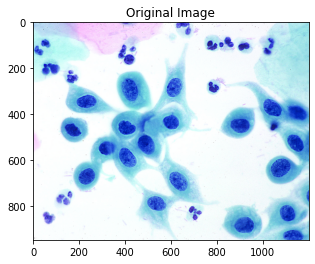

In [26]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title('Original Image')
plt.imshow(img)

conv2d (1, 111, 111, 32) 


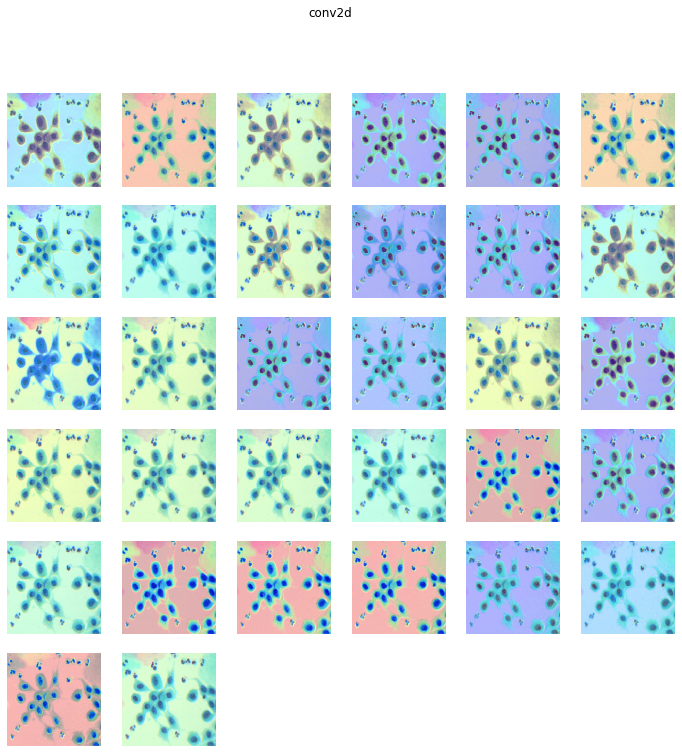

In [25]:
x = class_activation_map(img_path, model_path)